# What is the weather like as you approach the equator?

### A data analysis showing the relationship of weather patterns to the equator

##### Notes and Considerations:

- The data used in this example was pulled at 11:00 AM EST on December 23, 2017.
- Graphs in this output are flipped along the axes, that is, the independent is on the Y-axis and the dependent is on the X-axis. I purposefully flipped in this case since we are looking at the relationship of how far away a city is from the equator to its current weather. On the graphs, the line y = 0 would represent the equator, making the graphs an easier representation of how we generally look at the world.
- The data pulled through OpenWeatherMap.com is in imperial units, meaning temp is displayed in Fahrenheit.
- Feel free to run this exercise at different times to see how time and data change the data.

Observations:

- In this data set, the most extreme temperatures do not happen exactly at the equator or at the northern/southern poles. The highest temperature happens near 10.274128 degrees North at the town of Am Timan, Chad, near the Saharan Desert. The coldest temperature happens near 62.42979 degrees North at the town of Kangalassy, Russia, along the Lena River.
- In this data set, even though different equators are in different "seasons", Humidity, Wind Speed, and Cloud Coverage were normalized between the two equators. This means that, besides a current temperature, an aggregate of the two hemispheres are rather close in the other three categories.
- The effect of the different seasons on the data set is apparent in the Temperature scatter plot. Generally, the locations found below the equator are warmer than those above. 
- While this data analysis answers the question it set out to answer, the data doesn't take into account different physiological qualities of the randomly generated coordinates. I believe the next step to answer this question is to look at other qualities such as elevation, percentage of land that is natural v urbanized, or even a look at historical data to see how the land surrounding the area effects the temperature. An example to explore would be to look at places that are near mountain ranges with a higher historical rate of rainfall per year and see if that keeps temperature down even if the location may be close to the equator. However, generally speaking, you can confirm that temperature rises as a city is closer to the equator.

In [62]:
steve = final_df["Temp"].max()
marc = final_df.loc[final_df["Temp"] == steve, :]
marc

,Lat,Lng,City,Country,Temp,Hum,Cloud,Wind
354,10.274128,19.894109,am timan,td,100.84,12,0,4.38


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests as req
from citipy import citipy
import time
import json
import time

In [3]:
# Run to get a random set of longitude and latitude coordinates
list1 = np.random.uniform(-90,90, size = 1800)
list2 = np.random.uniform(-180,180, size = 1800)

In [4]:
#Create a df
list1_df = pd.DataFrame({"Lat": list1, "Lng": list2})
list1_df.head()

,Lat,Lng
0,-8.425875,-113.445745
1,-7.067614,175.715527
2,-70.629471,-25.455300
3,50.397708,114.131234
4,41.792746,177.089244


In [5]:
# Make new columns in data frame to fill in with city data
list1_df["City"] = ""
list1_df["Country"] = ""

# Use citipy to find the nearest city to given random coords and write into the DF
for index, row in list1_df.iterrows():
    city = citipy.nearest_city(row["Lat"], row["Lng"])
    list1_df.set_value(index, "City", city.city_name)
    list1_df.set_value(index, "Country", city.country_code)

# Remove duplicate cities
list1_df = list1_df.drop_duplicates(["City"], keep='first')

# Count unique "Cities" to ensure a significant number for later manipulation. In this instance, 500 is the desired minimum.
# However, a city may not have any weather data in the next step, so we are going to shoot for 650 unique cities.
# On first run through, I started with a sample of 700 randomized coordinates. This lent only 352 unique cities.
# Attempt two: 900 randomized coords, 445 unique cities.
# Attempt three: 1100 randomized coords, 485 unique cities.
# Attempt four: 1200 randomized coords, 546 unique cities.
# Attempt five: 1800 randomized coords, 694 unique cities.

list1_df.count()

Lat        694
Lng        694
City       694
Country    694
dtype: int64

In [6]:
# Build the API URL
akey = "34ae2627193903bb86906bf116b20b46"
url = "http://api.openweathermap.org/data/2.5/weather?q="

list1_df["Temp"] = ""
list1_df["Hum"] = ""
list1_df["Cloud"] = ""
list1_df["Wind"] = ""

SleepCounter = 0
PullCounter = 0
BatchCounter = 1

# Loop through the APIs to construct new columns in df
for index, row in list1_df.iterrows():
    try:
        query = url + row["City"].replace(" ","+") + "," + row["Country"] + "&appid=" + akey + "&units=imperial"
        get = req.get(query)
        getJ = get.json()
        list1_df.set_value(index, "Temp", getJ["main"]["temp"])
        list1_df.set_value(index, "Hum", getJ["main"]["humidity"])
        list1_df.set_value(index, "Cloud", getJ["clouds"]["all"])
        list1_df.set_value(index, "Wind", getJ["wind"]["speed"])
    except:
        list1_df.set_value(index, "Temp", "FAIL")
    
    PullCounter += 1
    
    SleepCounter += 1
    
    # If loop to ensure not overloading the weather API
    if SleepCounter == 40:
        print("~~~ Break Time ~~~")
        time.sleep(10)
        print("")
        SleepCounter = 0
        BatchCounter += 1
    
    # Printing API link
    print("Processing Record " + str(PullCounter) + " of Set " + str(BatchCounter) +" | " + row["City"])
    print(query)

Processing Record 1 of Set 1 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?q=puerto+ayora,ec&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 2 of Set 1 | lolua
http://api.openweathermap.org/data/2.5/weather?q=lolua,tv&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 3 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 4 of Set 1 | duldurga
http://api.openweathermap.org/data/2.5/weather?q=duldurga,ru&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 5 of Set 1 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?q=nikolskoye,ru&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 6 of Set 1 | bistret
http://api.openweathermap.org/data/2.5/weather?q=bistret,ro&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 7 of Set 1 | klaksvik
http://api.openweathermap.or

Processing Record 54 of Set 2 | mogadishu
http://api.openweathermap.org/data/2.5/weather?q=mogadishu,so&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 55 of Set 2 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?q=cabo+san+lucas,mx&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 56 of Set 2 | kaitangata
http://api.openweathermap.org/data/2.5/weather?q=kaitangata,nz&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 57 of Set 2 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?q=mys+shmidta,ru&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 58 of Set 2 | riyadh
http://api.openweathermap.org/data/2.5/weather?q=riyadh,sa&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 59 of Set 2 | merauke
http://api.openweathermap.org/data/2.5/weather?q=merauke,id&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 60 of Set 2 | iquique
http:/

Processing Record 107 of Set 3 | samusu
http://api.openweathermap.org/data/2.5/weather?q=samusu,ws&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 108 of Set 3 | armidale
http://api.openweathermap.org/data/2.5/weather?q=armidale,au&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 109 of Set 3 | balikpapan
http://api.openweathermap.org/data/2.5/weather?q=balikpapan,id&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 110 of Set 3 | victoria
http://api.openweathermap.org/data/2.5/weather?q=victoria,sc&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 111 of Set 3 | karkaralinsk
http://api.openweathermap.org/data/2.5/weather?q=karkaralinsk,kz&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 112 of Set 3 | tuatapere
http://api.openweathermap.org/data/2.5/weather?q=tuatapere,nz&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 113 of Set 3 | kangaatsiaq
htt

Processing Record 159 of Set 4 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?q=attawapiskat,ca&appid=34ae2627193903bb86906bf116b20b46&units=imperial
~~~ Break Time ~~~

Processing Record 160 of Set 5 | tiznit
http://api.openweathermap.org/data/2.5/weather?q=tiznit,ma&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 161 of Set 5 | torbay
http://api.openweathermap.org/data/2.5/weather?q=torbay,ca&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 162 of Set 5 | road town
http://api.openweathermap.org/data/2.5/weather?q=road+town,vg&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 163 of Set 5 | yakeshi
http://api.openweathermap.org/data/2.5/weather?q=yakeshi,cn&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 164 of Set 5 | khatanga
http://api.openweathermap.org/data/2.5/weather?q=khatanga,ru&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 165 of Set 5 | comod

Processing Record 211 of Set 6 | bunbury
http://api.openweathermap.org/data/2.5/weather?q=bunbury,au&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 212 of Set 6 | gamba
http://api.openweathermap.org/data/2.5/weather?q=gamba,ga&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 213 of Set 6 | vao
http://api.openweathermap.org/data/2.5/weather?q=vao,nc&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 214 of Set 6 | kalmunai
http://api.openweathermap.org/data/2.5/weather?q=kalmunai,lk&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 215 of Set 6 | nanlong
http://api.openweathermap.org/data/2.5/weather?q=nanlong,cn&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 216 of Set 6 | yulara
http://api.openweathermap.org/data/2.5/weather?q=yulara,au&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 217 of Set 6 | coruripe
http://api.openweathermap.org/data/2.5/w

Processing Record 264 of Set 7 | palu
http://api.openweathermap.org/data/2.5/weather?q=palu,id&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 265 of Set 7 | prince rupert
http://api.openweathermap.org/data/2.5/weather?q=prince+rupert,ca&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 266 of Set 7 | namtsy
http://api.openweathermap.org/data/2.5/weather?q=namtsy,ru&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 267 of Set 7 | nizhneyansk
http://api.openweathermap.org/data/2.5/weather?q=nizhneyansk,ru&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 268 of Set 7 | souillac
http://api.openweathermap.org/data/2.5/weather?q=souillac,mu&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 269 of Set 7 | samarai
http://api.openweathermap.org/data/2.5/weather?q=samarai,pg&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 270 of Set 7 | lorengau
http://api.ope

Processing Record 317 of Set 8 | alta
http://api.openweathermap.org/data/2.5/weather?q=alta,no&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 318 of Set 8 | pavilosta
http://api.openweathermap.org/data/2.5/weather?q=pavilosta,lv&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 319 of Set 8 | barra do corda
http://api.openweathermap.org/data/2.5/weather?q=barra+do+corda,br&appid=34ae2627193903bb86906bf116b20b46&units=imperial
~~~ Break Time ~~~

Processing Record 320 of Set 9 | palatka
http://api.openweathermap.org/data/2.5/weather?q=palatka,us&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 321 of Set 9 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?q=lavrentiya,ru&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 322 of Set 9 | clyde river
http://api.openweathermap.org/data/2.5/weather?q=clyde+river,ca&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 323 of

Processing Record 369 of Set 10 | lundazi
http://api.openweathermap.org/data/2.5/weather?q=lundazi,zm&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 370 of Set 10 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?q=saint-philippe,re&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 371 of Set 10 | alice springs
http://api.openweathermap.org/data/2.5/weather?q=alice+springs,au&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 372 of Set 10 | ancud
http://api.openweathermap.org/data/2.5/weather?q=ancud,cl&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 373 of Set 10 | dharan
http://api.openweathermap.org/data/2.5/weather?q=dharan,np&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 374 of Set 10 | the valley
http://api.openweathermap.org/data/2.5/weather?q=the+valley,ai&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 375 of Set 10 | band

Processing Record 421 of Set 11 | limon
http://api.openweathermap.org/data/2.5/weather?q=limon,hn&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 422 of Set 11 | andevoranto
http://api.openweathermap.org/data/2.5/weather?q=andevoranto,mg&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 423 of Set 11 | platanos
http://api.openweathermap.org/data/2.5/weather?q=platanos,gr&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 424 of Set 11 | ucluelet
http://api.openweathermap.org/data/2.5/weather?q=ucluelet,ca&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 425 of Set 11 | shahrud
http://api.openweathermap.org/data/2.5/weather?q=shahrud,ir&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 426 of Set 11 | opuwo
http://api.openweathermap.org/data/2.5/weather?q=opuwo,na&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 427 of Set 11 | naze
http://api.openweathe

Processing Record 473 of Set 12 | safford
http://api.openweathermap.org/data/2.5/weather?q=safford,us&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 474 of Set 12 | ponta delgada
http://api.openweathermap.org/data/2.5/weather?q=ponta+delgada,pt&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 475 of Set 12 | anshun
http://api.openweathermap.org/data/2.5/weather?q=anshun,cn&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 476 of Set 12 | marienburg
http://api.openweathermap.org/data/2.5/weather?q=marienburg,sr&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 477 of Set 12 | san ramon
http://api.openweathermap.org/data/2.5/weather?q=san+ramon,bo&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 478 of Set 12 | kovdor
http://api.openweathermap.org/data/2.5/weather?q=kovdor,ru&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 479 of Set 12 | mocuba
http:

Processing Record 525 of Set 14 | jiddah
http://api.openweathermap.org/data/2.5/weather?q=jiddah,sa&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 526 of Set 14 | sibolga
http://api.openweathermap.org/data/2.5/weather?q=sibolga,id&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 527 of Set 14 | pochutla
http://api.openweathermap.org/data/2.5/weather?q=pochutla,mx&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 528 of Set 14 | carutapera
http://api.openweathermap.org/data/2.5/weather?q=carutapera,br&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 529 of Set 14 | labuhan
http://api.openweathermap.org/data/2.5/weather?q=labuhan,id&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 530 of Set 14 | bridlington
http://api.openweathermap.org/data/2.5/weather?q=bridlington,gb&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 531 of Set 14 | grants pass
http

Processing Record 577 of Set 15 | dutse
http://api.openweathermap.org/data/2.5/weather?q=dutse,ng&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 578 of Set 15 | nakasongola
http://api.openweathermap.org/data/2.5/weather?q=nakasongola,ug&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 579 of Set 15 | nsanje
http://api.openweathermap.org/data/2.5/weather?q=nsanje,mw&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 580 of Set 15 | vardo
http://api.openweathermap.org/data/2.5/weather?q=vardo,no&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 581 of Set 15 | sfantu gheorghe
http://api.openweathermap.org/data/2.5/weather?q=sfantu+gheorghe,ro&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 582 of Set 15 | bilibino
http://api.openweathermap.org/data/2.5/weather?q=bilibino,ru&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 583 of Set 15 | dhidhdhoo
http

Processing Record 629 of Set 16 | rungata
http://api.openweathermap.org/data/2.5/weather?q=rungata,ki&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 630 of Set 16 | broome
http://api.openweathermap.org/data/2.5/weather?q=broome,au&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 631 of Set 16 | erdenet
http://api.openweathermap.org/data/2.5/weather?q=erdenet,mn&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 632 of Set 16 | prince george
http://api.openweathermap.org/data/2.5/weather?q=prince+george,ca&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 633 of Set 16 | boende
http://api.openweathermap.org/data/2.5/weather?q=boende,cd&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 634 of Set 16 | abalak
http://api.openweathermap.org/data/2.5/weather?q=abalak,ne&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 635 of Set 16 | luis correia
http://api.

Processing Record 681 of Set 18 | mahon
http://api.openweathermap.org/data/2.5/weather?q=mahon,es&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 682 of Set 18 | bratsk
http://api.openweathermap.org/data/2.5/weather?q=bratsk,ru&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 683 of Set 18 | uddevalla
http://api.openweathermap.org/data/2.5/weather?q=uddevalla,se&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 684 of Set 18 | saryozek
http://api.openweathermap.org/data/2.5/weather?q=saryozek,kz&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 685 of Set 18 | winnemucca
http://api.openweathermap.org/data/2.5/weather?q=winnemucca,us&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 686 of Set 18 | mundra
http://api.openweathermap.org/data/2.5/weather?q=mundra,in&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 687 of Set 18 | sioux lookout
http://api.o

In [7]:
# Remove any rows that did not have data and run a final count to ensure a large enough data table
final_df = list1_df.loc[list1_df["Temp"] != "FAIL", :]
print(final_df.count())
final_df.head()

Lat        607
Lng        607
City       607
Country    607
Temp       607
Hum        607
Cloud      607
Wind       607
dtype: int64


,Lat,Lng,City,Country,Temp,Hum,Cloud,Wind
0,-8.425875,-113.445745,puerto ayora,ec,75.2,69,75,10.29
2,-70.629471,-25.455300,ushuaia,ar,50,57,90,12.75
3,50.397708,114.131234,duldurga,ru,5.44,53,12,10.09
4,41.792746,177.089244,nikolskoye,ru,28.4,92,90,17.9
6,77.889262,-3.535988,klaksvik,fo,42.8,81,32,23.04


In [8]:
# Make new df's to plot
temp_df = final_df[["Lat", "Temp"]]
hum_df = final_df[["Lat", "Hum"]]
cloud_df = final_df[["Lat", "Cloud"]]
wind_df = final_df[["Lat", "Wind"]]

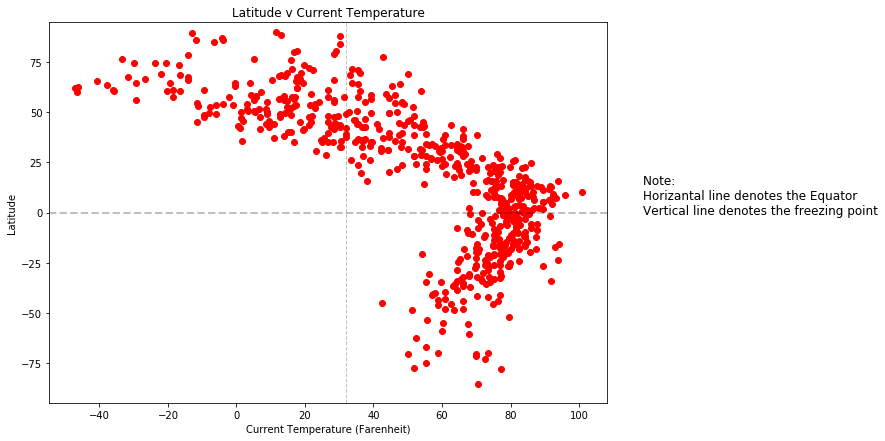

In [51]:
# Lat v Temp scatter plot
plt.figure(figsize=(10,7))
plt.scatter(temp_df["Temp"], temp_df["Lat"], color = "red")
plt.title("Latitude v Current Temperature")
plt.xlabel("Current Temperature (Farenheit)")
plt.ylabel("Latitude")
plt.ylim(-95, 95)
plt.figtext(.95, .5, "Note: \nHorizantal line denotes the Equator \nVertical line denotes the freezing point", fontsize=12)
plt.axhline(y=0, linestyle='--', linewidth = 2, color = "black", alpha=.25)
plt.axvline(x=32, linestyle = "--", linewidth = 1, color = "black", alpha = .25)
plt.savefig("Figures/Lat_Temp.png", bbox_inches = 'tight')
plt.show()

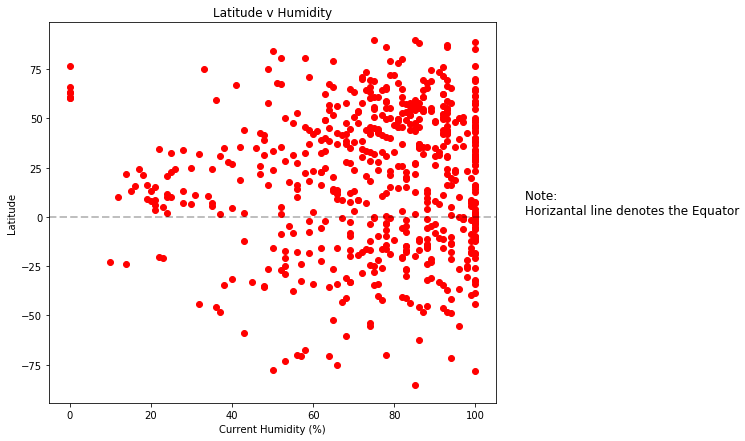

In [54]:
# Lat v Hum scatter plot
plt.figure(figsize=(8,7))
plt.scatter(hum_df["Hum"], hum_df["Lat"], color = "red")
plt.title("Latitude v Humidity")
plt.xlabel("Current Humidity (%)")
plt.ylabel("Latitude")
plt.axhline(y=0, linestyle='--', linewidth = 2, color = "black", alpha=.25)
plt.figtext(.95, .5, "Note: \nHorizantal line denotes the Equator", fontsize=12)
plt.savefig("Figures/Lat_Hum.png", bbox_inches = 'tight')
plt.show()

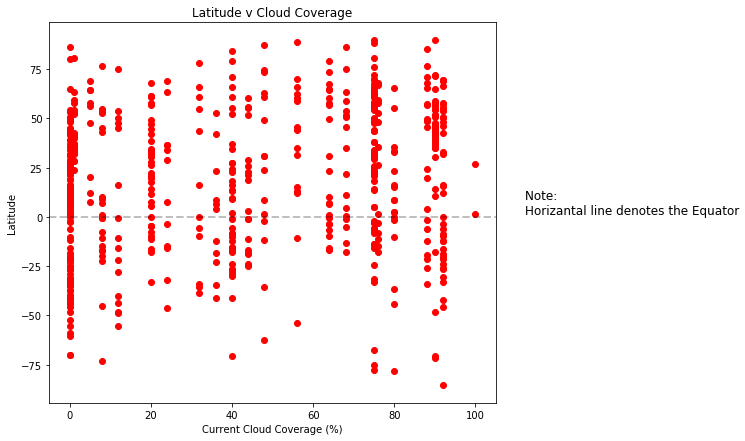

In [53]:
plt.figure(figsize=(8,7))
plt.scatter(cloud_df["Cloud"], cloud_df["Lat"], color = "red")
plt.title("Latitude v Cloud Coverage")
plt.xlabel("Current Cloud Coverage (%)")
plt.ylabel("Latitude")
plt.axhline(y=0, linestyle='--', linewidth = 2, color = "black", alpha=.25)
plt.figtext(.95, .5, "Note: \nHorizantal line denotes the Equator", fontsize=12)
plt.savefig("Figures/Lat_Cloud.png", bbox_inches = 'tight')
plt.show()

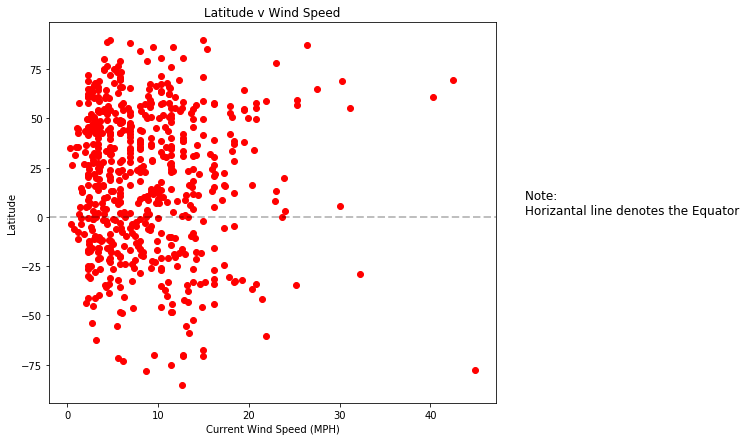

In [52]:
plt.figure(figsize=(8,7))
plt.scatter(wind_df["Wind"], wind_df["Lat"], color = "red")
plt.title("Latitude v Wind Speed")
plt.xlabel("Current Wind Speed (MPH)")
plt.ylabel("Latitude")
plt.axhline(y=0, linestyle='--', linewidth = 2, color = "black", alpha=.25)
plt.figtext(.95, .5, "Note: \nHorizantal line denotes the Equator", fontsize=12)
plt.savefig("Figures/Lat_Wind.png", bbox_inches = 'tight')
plt.show()